In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# addiing a file 
df=pd.read_csv("Real_Data.csv", header=0, sep=",")

In [6]:
## shows the head of the file 
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

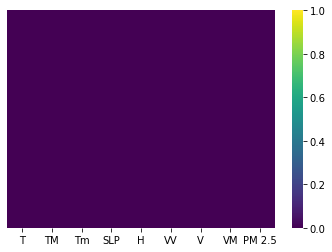

In [8]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [9]:
## removes null values 
df=df.dropna()

In [10]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [11]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False


In [12]:
y.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Name: PM 2.5, Length: 729, dtype: bool

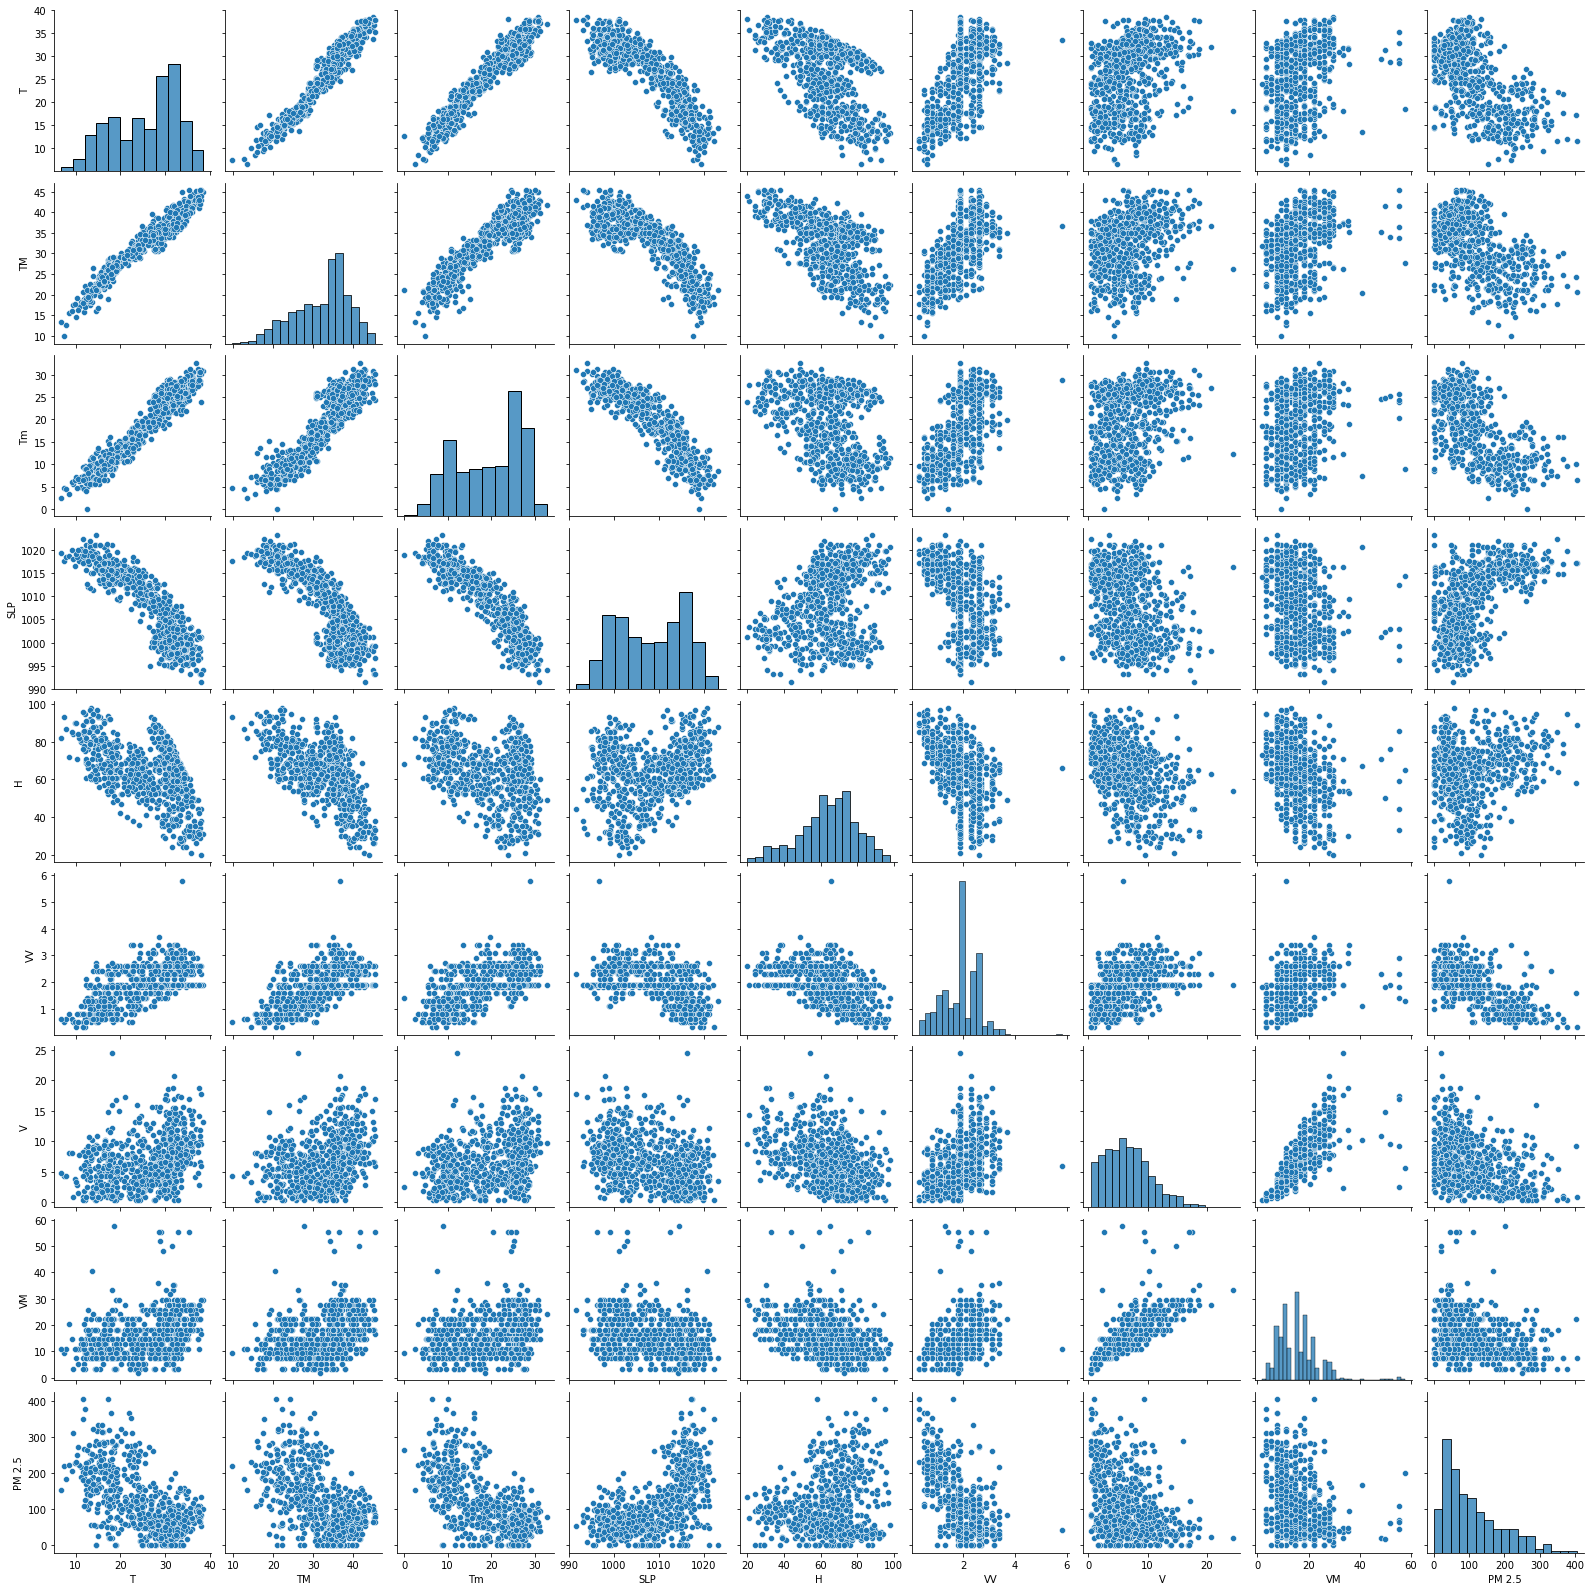

In [13]:
## using seaborn library
sns.pairplot(df)

In [14]:
## correlational computation
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967351,0.958858,-0.884487,-0.518956,0.622300,0.327801,0.288650,-0.628047
TM,0.967351,1.000000,0.896780,-0.829230,-0.599633,0.598786,0.321150,0.300404,-0.569230
Tm,0.958858,0.896780,1.000000,-0.909693,-0.315317,0.559623,0.314819,0.261087,-0.668782
SLP,-0.884487,-0.829230,-0.909693,1.000000,0.274159,-0.492161,-0.346984,-0.300540,0.615564
H,-0.518956,-0.599633,-0.315317,0.274159,1.000000,-0.475969,-0.399676,-0.371469,0.174588
VV,0.622300,0.598786,0.559623,-0.492161,-0.475969,1.000000,0.406948,0.351065,-0.628451
V,0.327801,0.321150,0.314819,-0.346984,-0.399676,0.406948,1.000000,0.760377,-0.356403
VM,0.288650,0.300404,0.261087,-0.300540,-0.371469,0.351065,0.760377,1.000000,-0.285053
PM 2.5,-0.628047,-0.569230,-0.668782,0.615564,0.174588,-0.628451,-0.356403,-0.285053,1.000000


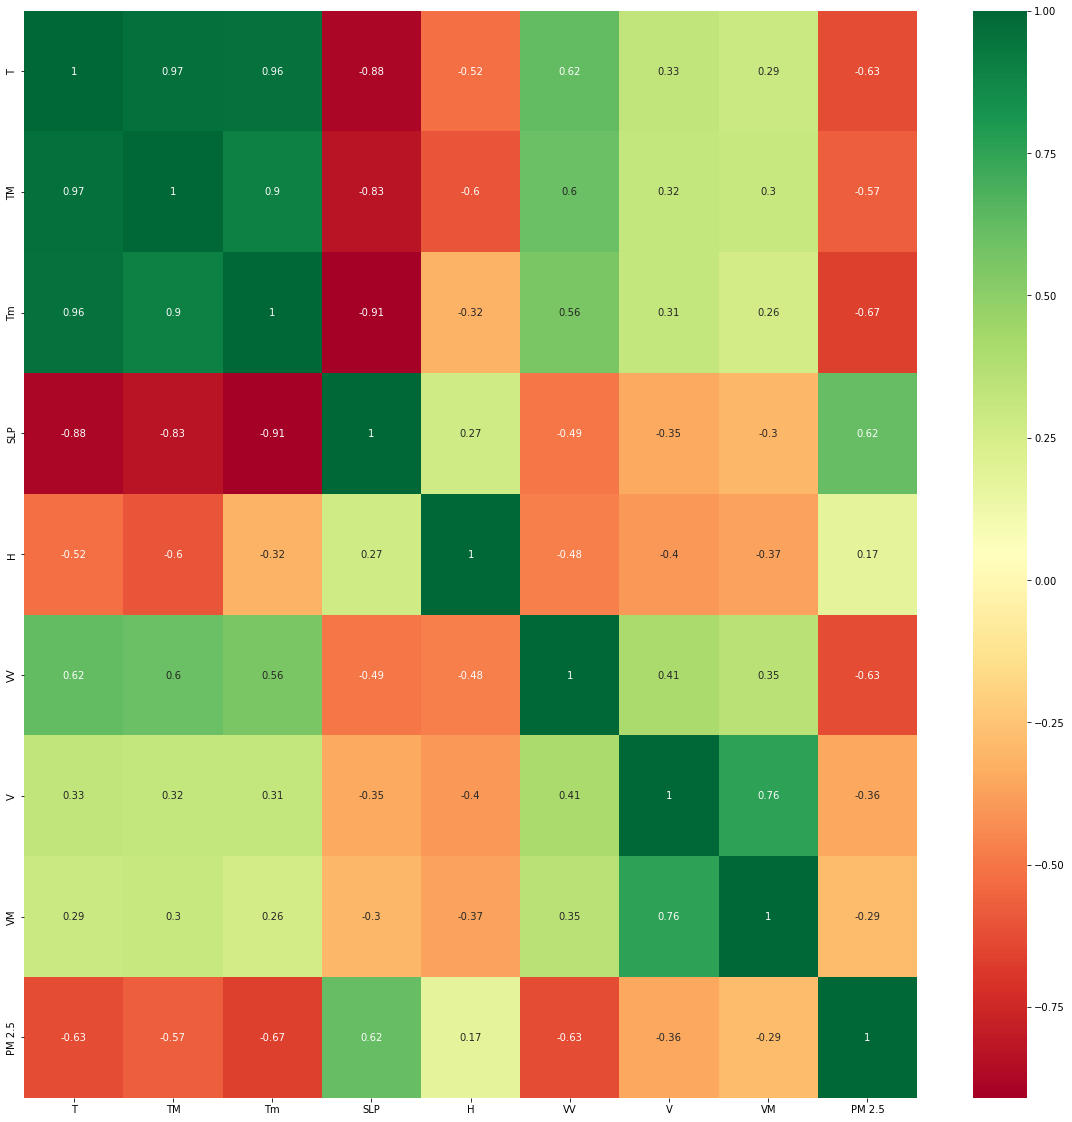

In [15]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
## index
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [17]:
## use of sklearn
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [19]:
## model feature 
print(model.feature_importances_)

[0.16583906 0.09045265 0.19268293 0.12985935 0.08167691 0.24405134
 0.05434346 0.04109432]


/Users/moreno/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


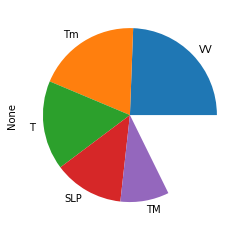

In [20]:
#plot pie chart of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='pie')
plt.show()

/Users/moreno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

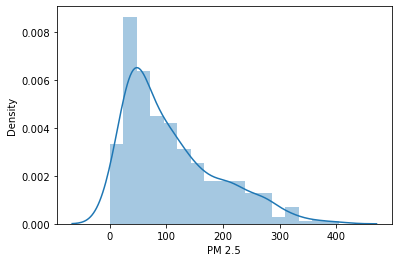

In [21]:
## distance plot 
sns.distplot(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [23]:
## linear regression
from sklearn.linear_model import LinearRegression

In [24]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
regressor.coef_

array([ 1.36261852e+00,  3.70630340e-02, -6.30367169e+00,  1.59172419e-01,
       -9.07379298e-01, -5.12640215e+01, -2.80420934e+00,  1.06019668e-01])

In [26]:
## intercept
regressor.intercept_

206.32593473686563

In [27]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.5866333798458776


In [28]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5668360623130534


In [29]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [30]:
## printing mean value 
score.mean()

0.46764721946523347

In [31]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,1.362619
TM,0.037063
Tm,-6.303672
SLP,0.159172
H,-0.907379
VV,-51.264022
V,-2.804209
VM,0.106020


In [32]:
prediction=regressor.predict(X_test)

/Users/moreno/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

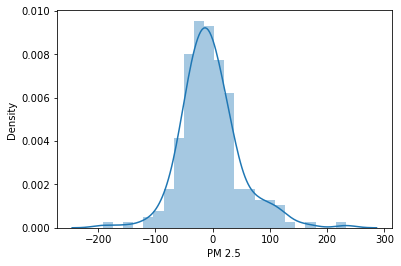

In [33]:
## distance plot
sns.distplot(y_test-prediction)

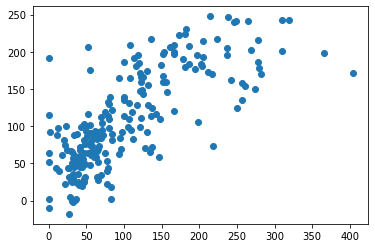

In [34]:
## scattered plot 
plt.scatter(y_test,prediction)

In [35]:
## metrics
from sklearn import metrics

In [36]:
import pickle

In [37]:
# this opens a file, where data is stored
file = open('regression_model.pkl', 'wb')

# information is dumped into this file
pickle.dump(regressor, file)